## Basic Graph containing Passes Data 
Here I will be testing the API from statsbombpy. 

In [6]:
# imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Here Comes the data from leagues:

In [7]:
from statsbombpy import sb

In [8]:
data = {
    'x': [2010, 2015, 2020, 2025, 2030],
    'y': [1, 2, 3, 4, 5]
}

In [9]:
print(data)

{'x': [2010, 2015, 2020, 2025, 2030], 'y': [1, 2, 3, 4, 5]}


#### Let's Graph the data

In [10]:
competitions = sb.competitions()
print(competitions)

c:\Users\user\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


    competition_id  season_id   country_name    competition_name  \
0                9         27        Germany       1. Bundesliga   
1               16          4         Europe    Champions League   
2               16          1         Europe    Champions League   
3               16          2         Europe    Champions League   
4               16         27         Europe    Champions League   
..             ...        ...            ...                 ...   
60              12         86          Italy             Serie A   
61              55         43         Europe           UEFA Euro   
62              35         75         Europe  UEFA Europa League   
63              53        106         Europe   UEFA Women's Euro   
64              72         30  International   Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False 

## Matches of the World Cup: 

In [11]:
competition_id = 43
season_id = 106
matches = sb.matches(competition_id=competition_id, season_id=season_id)

print(matches)

c:\Users\user\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


    match_id  match_date      kick_off                     competition season  \
0    3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2    3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3    3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4    3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
59   3857265  2022-11-22  18:00:00.000  International - FIFA World Cup   2022   
60   3857262  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
61   3857261  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   

      home_team    away_tea

## Filtering data France-England

The filter is based in: 
- Team
- Type
-Second
- Minute
- Location where the pass is made
- Location where the pass finish
- The player that has the ball

In [169]:
match_id = 3869354

test_match = sb.events(match_id=match_id)
england = test_match[['team', 'type', 'pass_outcome', 'minute', 'second', 'location', 'pass_end_location', 'player']][test_match['team'] == 'England']

print(england)

c:\Users\user\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


         team            type      pass_outcome  minute  second      location  \
0     England     Starting XI               NaN       0       0           NaN   
3     England      Half Start               NaN       0       0           NaN   
5     England      Half Start               NaN      45       0           NaN   
8     England            Pass               NaN       0       6  [33.8, 48.9]   
9     England            Pass  Injury Clearance       0      10  [20.6, 34.8]   
...       ...             ...               ...     ...     ...           ...   
3233  England    Substitution               NaN      78      51           NaN   
3234  England    Substitution               NaN      84      28           NaN   
3235  England    Substitution               NaN      97       4           NaN   
3237  England           50/50               NaN      92      54  [21.9, 28.1]   
3238  England  Tactical Shift               NaN      97      21           NaN   

     pass_end_location     

## Data from passes Completed of players
Now it's time to setup a metric to save test the passes of any player that we want.

Jude Bellingham
Correct Passes: 36 Incorrect Passes:  48


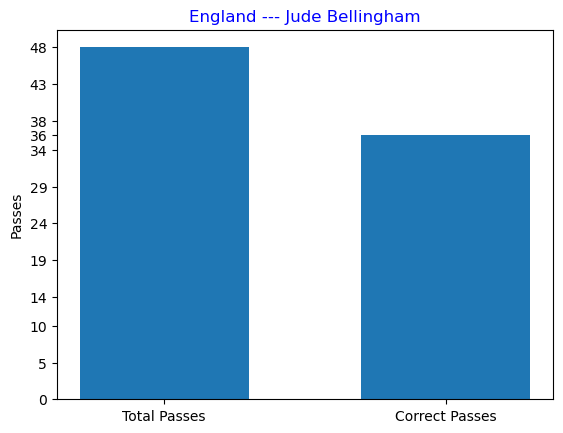

In [81]:
# Here I will put data from Jude Bellingham
test_player = england[england['player'] == 'Jude Bellingham'].reset_index()

# Filtering the correct passes
passes_correct = test_player[np.logical_and(pd.isna(test_player['pass_outcome']), test_player['type'] == 'Pass')]
passes_general = test_player[test_player['type'] == 'Pass']

categories = ['Total Passes', 'Correct Passes']
items = [len(passes_general), len(passes_correct)]

# Adding the values of the y AXIS
y_values = np.arange(0, len(passes_general)+1, step=len(passes_general) / 10)
y_values = np.append(y_values, len(passes_correct))

# print('Passes Correct:', len(passes_correct), 'Passes in General:', passes_general)
plt.bar(categories, items, width=0.6)
plt.ylabel("Passes")

#Title
plt.title(test_player['team'][0] +  ' --- ' + test_player['player'][0], color='blue')

# We round the values of the Y axis
plt.yticks(np.round(y_values))

#Print the name of the player:
print(test_player['player'][0])

# Correct passes and incorrect:
print('Correct Passes:', len(passes_correct), 'Incorrect Passes: ', len(passes_general))

## Calculating the effectiveness in the passes:

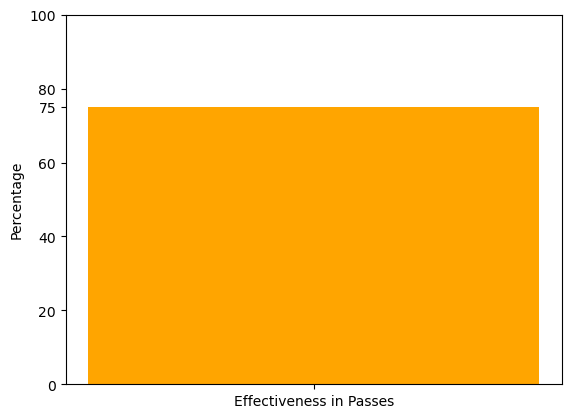

In [72]:
#effectiveness in passes 
success_passes = len(passes_correct) / len(passes_general) * 100

y_success = np.arange(0, 100, step=20)
y_success = np.append(y_success, [success_passes, 100])


# Effectiveness in passes
plt.bar('Effectiveness in Passes', success_passes, width=0.6, color='orange')
plt.yticks(y_success)

plt.ylabel('Percentage')

print()

#### Passes made from Jude Bellingham

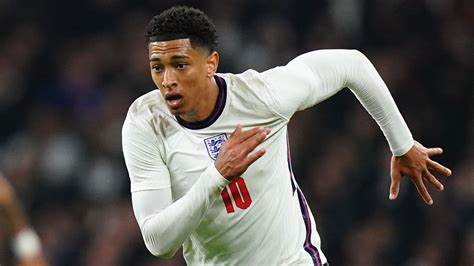